In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv("/Users/saanvi/Desktop/Train.csv")
train_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.0 kmpl,2993 CC,235 bhp,5.0,18.75
3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79 kmpl,2179 CC,120 bhp,7.0,6.25
3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,1.45
3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,6.60


In [199]:
# cleaning the file 
train_df=train_df.drop(["Unnamed: 0",'Name'],axis=1)
train_df = pd.get_dummies(train_df, columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first ='True')
train_df = train_df.dropna()
train_df.Mileage = train_df.Mileage.str.replace(' kmpl' , ' ').astype(float)
train_df.Engine = train_df.Engine.str.replace(' CC', ' ').astype(int)
train_df['Power'] = train_df['Power'].replace('null bhp', '0 bhp')
train_df.Power = train_df.Power.str.replace(' bhp',' ').astype(float)
train_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2017,16500,23.84,1199,84.00,5.0,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2017,47357,18.49,1493,100.00,7.0,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598,103.52,5.0,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,2007,200000,17.20,1396,53.50,5.0,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,64000,21.02,1248,88.76,5.0,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993,235.00,5.0,18.75,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179,120.00,7.0,6.25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3747,2007,55100,18.90,998,67.10,5.0,1.45,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3748,2014,77500,20.45,1461,83.80,5.0,6.60,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [200]:
# z score 
notHotEncoded = train_df.select_dtypes(include=['int64','float64']).columns 
notHotEncoded = notHotEncoded.drop('Price')
for i in notHotEncoded :
    train_df[i]=(train_df[i]-train_df[i].mean())/train_df[i].std()
train_df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.128049,-1.028504,1.291151,-0.704021,-0.493044,-0.344671,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,1.128049,-0.264174,0.088679,-0.214919,-0.206586,2.135759,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.202247,-0.570258,-0.695738,-0.040240,-0.143565,-0.344671,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,-1.957958,3.516800,-0.201263,-0.376289,-1.039106,-0.344671,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,-0.106354,0.148073,0.657324,-0.622504,-0.407823,-0.344671,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [201]:
# opening the test file
test_df=pd.read_csv('/Users/saanvi/Desktop/Test.csv')
test_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,Hyundai Elantra CRDi SX AT,Delhi,2013,71000,Diesel,Automatic,First,22.7 kmpl,1582 CC,126.2 bhp,5.0,6.80
1246,1246,Hyundai Getz GLS ABS,Pune,2005,91000,Petrol,Manual,Third,16.8 kmpl,1341 CC,83 bhp,5.0,0.80
1247,1247,Volkswagen Polo GT TSI,Coimbatore,2017,50534,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,8.27
1248,1248,Hyundai Verna SX CRDi AT,Pune,2012,83000,Diesel,Automatic,First,19.08 kmpl,1582 CC,126.32 bhp,5.0,6.00


In [202]:
# cleaning the test file 
test_df = test_df.drop(['Unnamed: 0','Name'],axis=1)
test_df = pd.get_dummies(test_df,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
test_df = test_df.dropna()
test_df.Mileage = test_df.Mileage.str.replace(' kmpl','').astype(float)
test_df.Engine = test_df.Engine.str.replace(' CC','').astype(float)
test_df['Power'] = test_df['Power'].replace('null bhp', '0 bhp')
test_df.Power = test_df.Power.str.replace(' bhp',' ').astype(float)
test_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2013,84175,23.40,1248.0,74.00,5.0,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2013,60000,20.36,1197.0,78.90,5.0,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2013,71000,22.70,1582.0,126.20,5.0,6.80,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1246,2005,91000,16.80,1341.0,83.00,5.0,0.80,False,False,False,...,False,False,False,True,False,True,True,False,False,True
1247,2017,50534,17.21,1197.0,103.50,5.0,8.27,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1248,2012,83000,19.08,1582.0,126.32,5.0,6.00,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [203]:
#z score normalisation
for i in notHotEncoded :
    test_df[i]=(test_df[i]-test_df[i].mean())/test_df[i].std()
test_df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.144330,0.117910,1.213411,-0.675429,-0.746936,-0.362368,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.456083,0.000129,-0.259345,-0.762614,-0.652720,-0.362368,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.102683,-0.133409,0.117406,-0.762614,-0.595805,-0.362368,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,-0.767837,0.240575,-1.047099,1.293920,1.964185,-0.362368,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.144330,-0.012147,0.519275,-0.762614,-0.652720,-0.362368,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [204]:
# separating the feature i need to predict 
Xtr=train_df.drop('Price',axis=1).to_numpy()
Ytr=train_df.Price.to_numpy()
Xte=test_df.drop('Price',axis=1).to_numpy()
Yte=test_df.Price.to_numpy()

print("Shape of X_standarized:", Xtr.shape)
print("Shape of Y_standarized:", Ytr.shape)

Shape of X_standarized: (3717, 22)
Shape of Y_standarized: (3717,)


In [186]:
# defining metric calculation function
def metric (y_true,y_pred):
    mse =((y_true- y_pred)**2).mean()
    rmse = mse**0.5
    mean_y = y_true.mean()
    total =((y_true - mean_y)**2).sum()
    res = ((y_true -y_pred) **2).sum()
    r2 = 1 - (res/total)
    
    return mse,rmse,r2

In [187]:
#defining cost function
def cost(x,y,w,a,b):
    m,n= x.shape
    predictions = x.dot(w) + b  
    cost_value = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (a / (2 * m)) * np.sum(w ** 2)  
    return cost_value

In [208]:
def gradient_descent(x, y, w, b, a, iterations):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    w = np.array(w, dtype=np.float64)

    m = len(y) 
    cost_history = []

    for i in range(iterations):
        predictions = x.dot(w) + b
        errors = predictions - y
        w -= a * (x.T.dot(errors) / m)
        b -= a * (errors.sum() / m)

        # Calculate and store the cost
        cost = ((errors ** 2).sum()) / (2 * m)
        cost_history.append(cost)

        # Output metrics every 100 iterations
        if i % 100 == 0:
            mse = (errors ** 2).mean()
            rmse = mse ** 0.5
            r2 = 1 - (errors.var() / y.var())
            print(f"Iteration {i}: MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}, Cost={cost:.2f}")

    return w, b, cost_history


In [216]:
def reg(x,y,a,iterations):
    x = np.array(x, dtype=np.float64)  
    y = np.array(y, dtype=np.float64)  
    n = x.shape[1] 
    w = np.zeros(n, dtype=np.float64) 
    b = 0.0  

    w,b,cost_history = gradient_descent(x,y,w,b,a,iterations)
    return w,b,cost_history

a = 0.1
iterations = 1000
w,b, cost_history = reg(Xtr,Ytr,a, iterations)

print("\nFinal cost:", cost_history[-1])
print("Final weights:", w)
print("Final bias:", b)
    

Iteration 0: MSE=216.63, RMSE=14.72, R²=0.0000, Cost=108.31
Iteration 100: MSE=41.21, RMSE=6.42, R²=0.6732, Cost=20.60
Iteration 200: MSE=39.73, RMSE=6.30, R²=0.6847, Cost=19.86
Iteration 300: MSE=39.38, RMSE=6.28, R²=0.6874, Cost=19.69
Iteration 400: MSE=39.29, RMSE=6.27, R²=0.6881, Cost=19.65
Iteration 500: MSE=39.27, RMSE=6.27, R²=0.6883, Cost=19.63
Iteration 600: MSE=39.26, RMSE=6.27, R²=0.6883, Cost=19.63
Iteration 700: MSE=39.26, RMSE=6.27, R²=0.6883, Cost=19.63
Iteration 800: MSE=39.26, RMSE=6.27, R²=0.6883, Cost=19.63
Iteration 900: MSE=39.26, RMSE=6.27, R²=0.6883, Cost=19.63

Final cost: 19.629481313516237
Final weights: [ 2.8658682  -1.11481104 -1.36376424  1.8044344   4.89930406 -1.24192158
  2.41989064  1.69362368  2.57519451 -0.42188483  2.82137989  1.43300663
  0.82730417 -0.85488331 -0.49185038  1.08242262  0.         -3.0642946
 -2.97178753 -0.12624494 -0.53089244  0.57585627]
Final bias: 12.077070869483217


In [217]:
#calculation of mean square scores
train_predictions = Xtr.dot(w) + b
test_predictions = Xte.dot(w) + b

_, _, r2_train = metric(Ytr, train_predictions)
_, _,r2_test = metric(Yte, test_predictions)

# Print R² scores
print(f"Training R² Score: {r2_train * 100:.2f}%")
print(f"Testing R² Score: {r2_test * 100:.2f}%")


Training R² Score: 68.83%
Testing R² Score: 65.80%


/var/folders/h_/b9n_4zmd1l30qdvx_596bvdh0000gn/T/ipykernel_5697/602904231.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


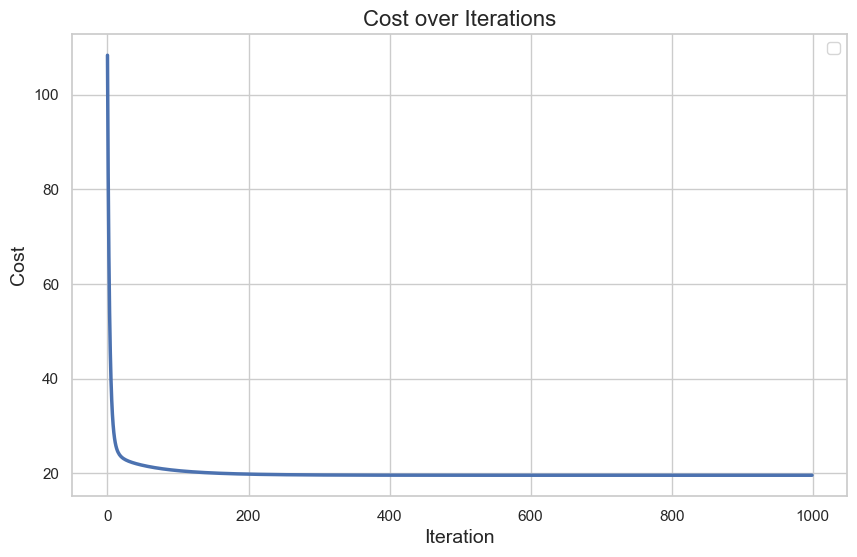

In [218]:
# for graph of cost over iterations
cost_df = pd.DataFrame({
    'Iteration': np.arange(len(cost_history)),  # Create an array of iteration numbers
    'Cost': cost_history  # Cost values
})
sns.set(style="whitegrid")
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_df, x='Iteration', y='Cost', linewidth=2.5, markersize=5)


plt.title('Cost over Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.legend()

plt.show()

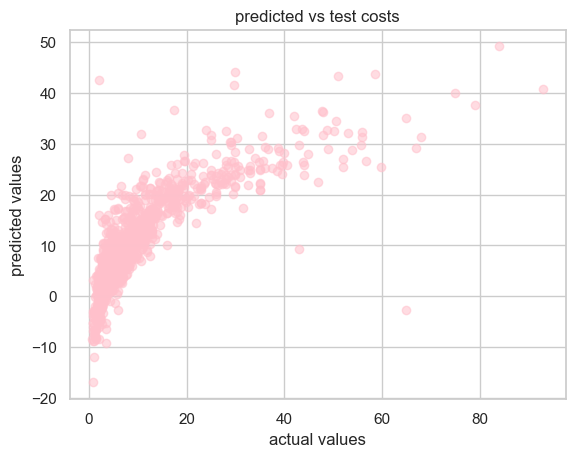

In [219]:
# for graph of preicted vs test costs
plt.scatter(Yte,test_predictions,color='pink',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs test costs')
plt.show()
